# Preprocessing

## Imports & Dataset load

In [1]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std
from numpy import ravel

from decimal import Decimal

import scipy
import joblib
import re
import glob
import sklearn

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
# from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import joblib

#vis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные, смотрим с чем работаем
fraud_df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
# Смотрим сколько у нас всего зафиксировано случаев мошенничества
fraud_df[fraud_df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


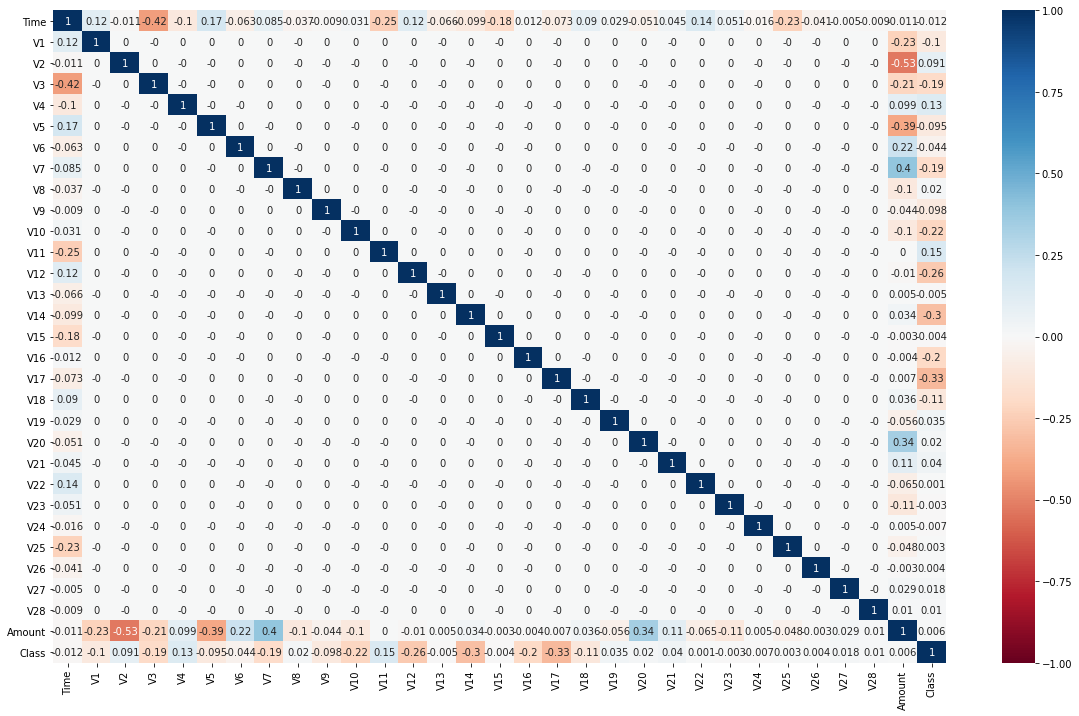

In [4]:
# Строим корреляционную матрицу
corr_matrix = fraud_df.corr().round(3)
figl, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", vmax=1, vmin=-1);

## Normilize & Train_test_split

In [5]:
# Обозчаем таргет
target = fraud_df['Class']

In [6]:
# Обозначаем фичи
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12',
#             'V13',
            'V14', 
#             'V15',
            'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 
#             'V22', 'V23', 'V24', 'V25', 'V26',
            'V27', 'V28',
#             'Amount'
           ]

In [7]:
# Делаем нормализацию
scaler = StandardScaler()
normalised_fraud_df = scaler.fit_transform(fraud_df[features])

In [8]:
# Делим на трейн и тест
x_train, x_test, y_train, y_test = train_test_split(normalised_fraud_df[:len(target)], target, test_size=0.2, random_state=8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 22), (56962, 22), (227845,), (56962,))

# Training model

### Focal loss

In [ ]:
# Пробуем хитрый xgboost focal
xgbooster = imb_xgb(
    special_objective='focal',
    focal_gamma = 0.01,
    booster='gbtree',
    eta= 0.2,
    max_depth= 6,
    eval_metric='auc'
)


xgbooster.fit(x_train, ravel(y_train))

In [ ]:
print(f'Roc_auc score is {roc_auc_score(y_test, xgbooster.predict_determine(x_test))}')
print(f'F1 score is {f1_score(y_test, xgbooster.predict_determine(x_test))}')


Roc_auc score is 0.9306139289471058
F1 score is 0.883248730964467
Precision score is 0.90625
Recall score is 0.8613861386138614


### Basic XGBoost

In [27]:
# Строим обычный xgboost 
xgb = XGBClassifier(
    alpha= 0.5, colsample_bytree= 0.75,
    eta= 0.2, gamma= 0.13, reg_lambda= 0.5,
    max_depth= 6, min_child_weight= 3, 
    n_estimators= 200, random_state= 8, subsample= 0.95,
    eval_metric='auc',
    use_label_encoder=False
)

# xgb_param_grid = {
#     'min_child_weight' : [7],
#     'colsample_bytree': [0.75],
#     'gamma': [0.2],
#     'alpha' : [0.75],
#     'lambda': [2],
#     'n_estimators' : [200],
#     'max_depth' : [4, 8],
#     'subsample' : [0.925, 0.975],
#     'eta' : [0.2],
#     'random_state' : [8]
    
# }

# xgb_gs = GridSearchCV(
#     estimator=xgb,
#     param_grid=xgb_param_grid,
#     scoring='f1',
#     cv=5,
#     verbose=4,
#     n_jobs=-1,
#     return_train_score=True
# )

xgb.fit(x_train, ravel(y_train))

XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, eta=0.2,
              eval_metric='auc', gamma=0.13, learning_rate=0.1,
              max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=8, reg_alpha=0,
              reg_lambda=0.5, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.95, use_label_encoder=False, verbosity=1)

In [ ]:
# Для вывода результатов GridSearch
res = pd.DataFrame(xgb_gs.cv_results_).sort_values('mean_test_score', ascending=False)
pd.set_option('max_colwidth', None)
res[['mean_test_score', 'mean_train_score', 'rank_test_score', 'params']].head(20)

In [28]:
# Для вывода результатов обучения
print(f'Roc_auc score is {roc_auc_score(y_test, xgb.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, xgb.predict(x_test))}')

Roc_auc score is 0.9058966271928365
F1 score is 0.8723404255319149


In [ ]:
# alpha= 0.5, colsample_bytree= 0.75,
#     eta= 0.2, gamma= 0.13, reg_lambda= 0.5,
#     max_depth= 6, min_child_weight= 3, 
#     n_estimators= 200, random_state= 8, subsample= 0.95,
#     eval_metric='auc',
#     use_label_encoder=False
# Roc_auc score is 0.9058966271928365
# F1 score is 0.8723404255319149
# without features with less 0.01 corr

In [ ]:
# Сохраняем модель
joblib.dump(xgb, 'xgbclass_f1_89')

['xgbclass_f1_89']

## Stacking

### Logistic

In [75]:
# строим модель линейной регрессии
lr = LogisticRegression(
    tol=0.001,
    penalty='elasticnet',
    C=0.5,
    l1_ratio=0,
    solver='saga',
    max_iter=250,
    multi_class='auto',
    verbose=3,
    n_jobs=-1
)

lr.fit(x_train, ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 23 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.5s finished


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=250,
                   multi_class='auto', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.001, verbose=3,
                   warm_start=False)

In [76]:
print(f'Roc_auc score is {roc_auc_score(y_test, lr.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, lr.predict(x_test))}')

Roc_auc score is 0.7969857361037277
F1 score is 0.7228915662650602


### KNN

In [22]:
# троим модель по методу ближайших соседей
knn = KNeighborsClassifier(
    leaf_size=40,
    n_neighbors=8,
    weights='distance',
    n_jobs=-1
)

knn.fit(x_train, ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [23]:
print(f'Roc_auc score is {roc_auc_score(y_test, knn.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, knn.predict(x_test))}')

Roc_auc score is 0.9108295354957137
F1 score is 0.869109947643979


In [ ]:
# leaf_size=40,
#     n_neighbors=8,
#     weights='distance',
#     n_jobs=-1

# Roc_auc score is 0.9157800305452187
# F1 score is 0.8749999999999999

### Tree

In [60]:
# строим дерево
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=16,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='log2'
)

tree.fit(x_train, ravel(y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
print(f'Roc_auc score is {roc_auc_score(y_test, tree.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, tree.predict(x_test))}')

Roc_auc score is 0.8860946469948168
F1 score is 0.8478260869565218


### SVC

In [78]:
# метод опорных векторов
svm = SVC(
    tol=0.001,
    C=0.8,
    kernel='poly',
    gamma='auto',
    max_iter=-1,
    verbose=3
)

svm.fit(x_train, ravel(y_train))

[LibSVM]

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

In [79]:
print(f'Roc_auc score is {roc_auc_score(y_test, svm.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, svm.predict(x_test))}')

Roc_auc score is 0.8811617386919396
F1 score is 0.8508287292817679


In [ ]:
# (C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    # decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    # max_iter=-1, probability=False, random_state=None, shrinking=True,
    # tol=0.001, verbose=3)
# Roc_auc score is 0.8811617386919396
# F1 score is 0.8508287292817679

### StackingClassifier

In [93]:
# назначаем модельки с нашими параметрами
level0 = list()
level0.append(('lr', LogisticRegression(
    tol=0.001,
    penalty='elasticnet',
    C=0.5,
    l1_ratio=0.2,
    solver='saga',
    max_iter=250,
    multi_class='ovr',
    verbose=3,
    n_jobs=-1
)))
level0.append(('knn', KNeighborsClassifier(
    leaf_size=40,
    n_neighbors=8,
    weights='distance',
    n_jobs=-1
)))
level0.append(('tree', DecisionTreeClassifier(
    criterion='gini',
    max_depth=16,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='log2'
)))
level0.append(('svm', SVC(
    tol=0.001,
    C=0.8,
    kernel='poly',
    gamma='auto',
    max_iter=-1,
    verbose=3
)))

# назначаем АРХИ модель
level1 = XGBClassifier(
    alpha= 0.5, colsample_bytree= 0.9,
    eta= 0.1, gamma= 0.13, reg_lambda= 0.5,
    max_depth= 5, min_child_weight= 2, 
    n_estimators= 200, random_state= 8, subsample= 0.97,
    eval_metric='auc',
    use_label_encoder=False
    )

# define the stacking ensemble
stacked_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

stacked_model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.5s finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.6s finished


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=0.5, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=0.2, max_iter=250,
                                                   multi_class='ovr', n_jobs=-1,
                                                   penalty='elasticnet',
                                                   random_state=None,
                                                   solver='saga', tol=0.001,
                                                   verbose=3,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                               

In [94]:
print(f'Roc_auc score is {roc_auc_score(y_test, stacked_model.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, stacked_model.predict(x_test))}')

Roc_auc score is 0.9158064106651603
F1 score is 0.888888888888889


In [ ]:
#     alpha= 0.5, colsample_bytree= 0.9,
#     eta= 0.1, gamma= 0.13, reg_lambda= 0.5,
#     max_depth= 5, min_child_weight= 2, 
#     n_estimators= 200, random_state= 8, subsample= 0.97,
#     eval_metric='auc',
#     use_label_encoder=False

# Roc_auc score is 0.9158064106651603
# F1 score is 0.888888888888889


In [84]:
joblib.dump(stacked_model, '/content/drive/MyDrive/stacked_models')

['/content/drive/MyDrive/stacked_models']

In [85]:
stacked_model_results = stzzacked_model.predict(x_test)
submissions = fraud_df.index[:len(y_test)]
submissions = pd.DataFrame(submissions)
del submissions[0]
submissions['Предсказанная транзакция'] = stacked_model_results
empty_list = []
for row in submissions['Предсказанная транзакция']:
    empty_list.append(round(Decimal(row)))
submissions['Предсказанная транзакция'] = empty_list
submissions['Настоящая транзакция'] = y_test.reset_index(drop=True)
submissions['Отклонение'] = [submissions['Настоящая транзакция'][row] - submissions['Предсказанная транзакция'][row] for row in range(len(submissions))]
submissions[submissions['Настоящая транзакция'] == 1].head(10)

,Предсказанная транзакция,Настоящая транзакция,Отклонение
1810,1,1,0
2357,1,1,0
3023,1,1,0
3688,1,1,0
4017,1,1,0
4320,1,1,0
4431,1,1,0
4432,1,1,0
4920,1,1,0
4997,1,1,0
